Here, we have run the algorithms from a `run.py` script that looks like this:
```python
from algorithms import ipop_cmaes, mlsl, dual_annealing
from framework import SaveHandlerJSON

save_handler = SaveHandlerJSON('../result/apr/')
algo = ipop_cmaes # change it after each run
algo.tune_params(
    db_path='../result/apr.db',
    save_handler=save_handler,
    iter_num=100,
)
```
and the results are saved to the locations as above. We are now retrieving these results and see the performance of the best instance!

In [5]:
import sys
sys.path.insert(0, "../src/")
from framework import *
from algorithms import dual_annealing, ipop_cmaes, mlsl, nelder_mead, nelder_mead_multi

But before we start, let's make a function that outputs the performance measures and hyper-params in LaTeX form so we can copy and paste them to Overleaf!

In [89]:
# convert the float number to latex format
def float_to_latex(float_number):
    import math
    if float('inf') == float_number:
        return "\\( +\\infty \\)"
    # Extracting the exponent part
    exponent = int(math.floor(math.log10(abs(float_number))))

    # Extracting the mantissa part
    mantissa = float_number / (10 ** exponent)

    # Formatting the float number in the LaTeX style format
    latex_formatted_number = "\\({:.2f} \\times 10^{{{}}}\\)".format(mantissa, exponent)
    return latex_formatted_number

def params_to_latex(ins, int_fields=[]):
    d = ins.trial.params
    for k, v in d.items():
        kk = k.replace('_', '\\_')
        if k in int_fields:
            print(f'& \\texttt{{{kk}}} & {v} \\\\')
        else:
            print(f'& \\texttt{{{kk}}} & {float_to_latex(v)} \\\\')

def performance_to_latex(ins):
    run_num = len(ins.results)
    d = ins.performance_measures()
    sr = d['success_rate']
    ah = d['avg_height']
    ert = d['ert']
    gert = d['gary_ert']
    print(ins.algorithm.name.replace('_', ' '), end='\t')
    print(f'& {run_num}', end='\t')
    print(f'& {round(sr * 100)}\\%', end='\t')
    print(f'& {round(ah)}', end='\t')
    print(f'& {float_to_latex(ert)} ', end='\t')
    print(f'& {float_to_latex(gert)} ', end='\\\\')

## Dual Annealing

In [34]:
dual_annealing.load_best_instance('../result/apr.db')
save_handler = SaveHandlerJSON('../result/apr/')

Let's first look at the hyper-parameters chosen for the best instance:

In [60]:
dual_ins = dual_annealing.best_instance
dual_ins.trial.params

{'initial_temp': 5233.605902308511,
 'restart_temp_ratio': 0.0016019230282447428,
 'visit': 2.522887187093767,
 'accept': -0.3886546637471418}

In [61]:
params_to_latex(dual_ins)

& \texttt{initial\_temp} & \(5.23 \times 10^{3}\) \\
& \texttt{restart\_temp\_ratio} & \(1.60 \times 10^{-3}\) \\
& \texttt{visit} & \(2.52 \times 10^{0}\) \\
& \texttt{accept} & \(-3.89 \times 10^{-1}\) \\


We want to run the best instance again, and save all its runs, including all the points evaluated:

In [36]:
dual_ins.run(
    save_handler=save_handler,
    save_partial=False,
    restart=True,
    does_prune=False,
)

1004952it [00:55, 18157.68it/s]                            


Now we can check its performance measures and plots:

In [62]:
dual_ins.performance_measures()

{'success_rate': 0.5666666666666667,
 'failure_rate': 0.43333333333333335,
 'success_cnt': 17,
 'avg_success_eval': 20879.529411764706,
 'hv': 16501.6,
 'par2': 55165.066666666666,
 'par10': 228498.4,
 'avg_height': 1328.6560910172088,
 'ert': 59114.82352941177,
 'sp': 36846.228373702426,
 'success_rate_upper': 0.7262276256938489,
 'success_rate_lower': 0.3919700954540874,
 'success_rate_length': 0.33425753023976157,
 'gary_ert': 4831.5}

In [63]:
performance_to_latex(dual_ins)

Dual Annealing	& 30	& 57\%	& 1329	& \(5.91 \times 10^{4}\) 	& \(4.83 \times 10^{3}\) \\

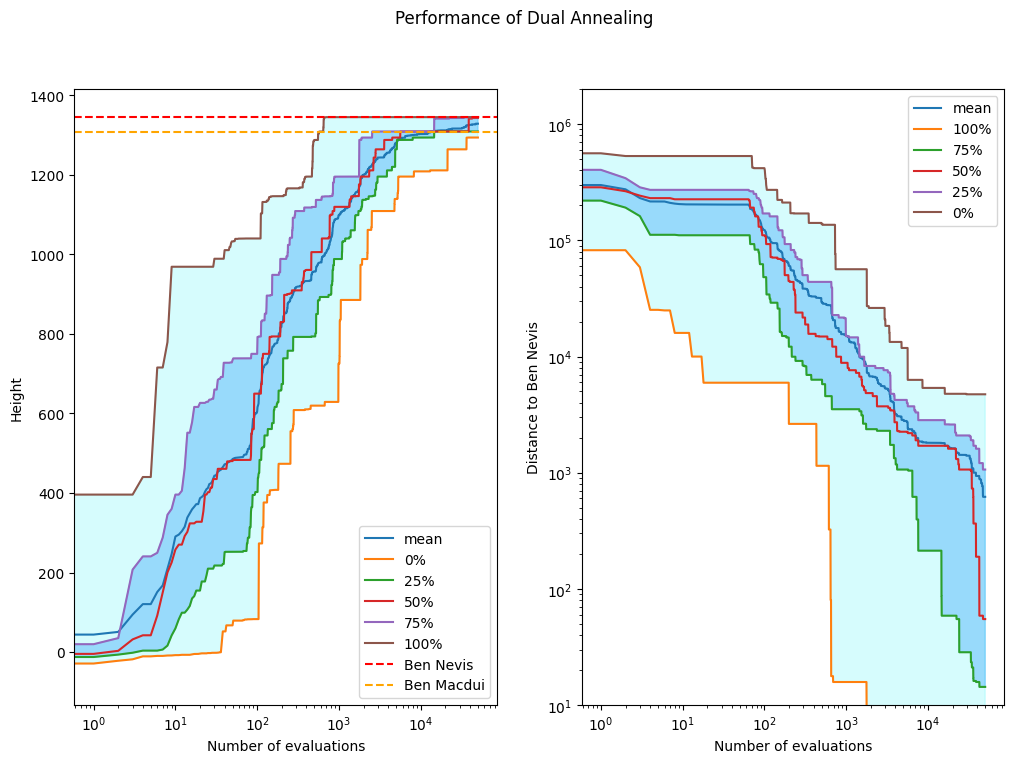

In [9]:
dual_ins.plot_convergence_graph()

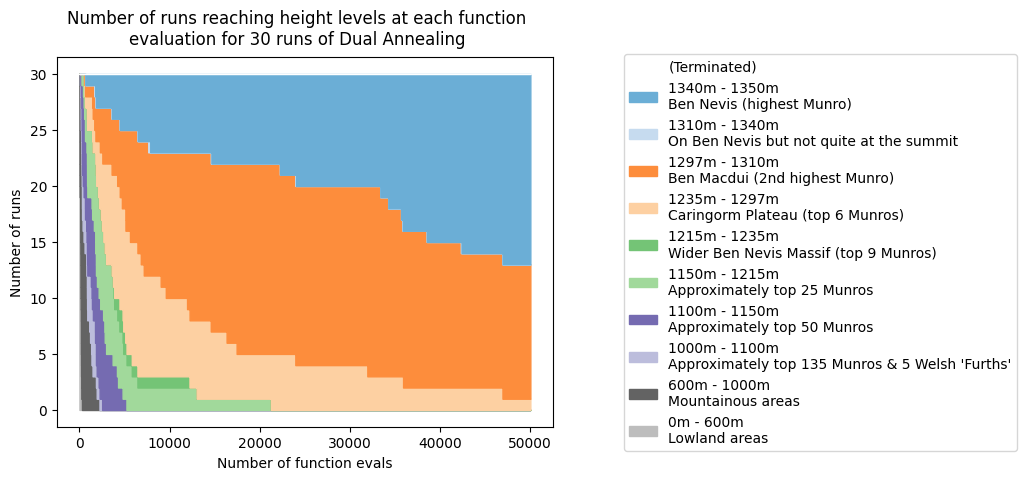

In [10]:
dual_ins.plot_stacked_graph()

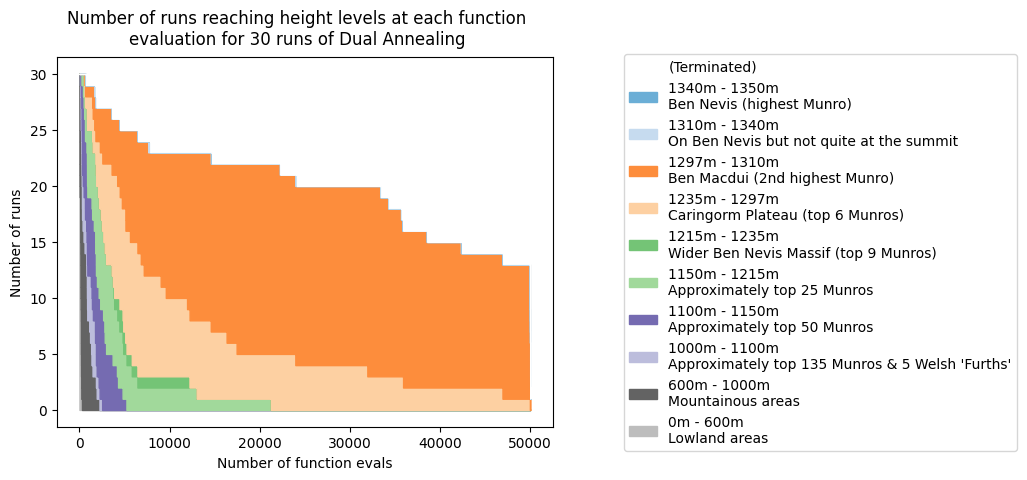

In [11]:
dual_ins.plot_stacked_graph(mode='terminate')

In [12]:
# if we wish to have more runs we could change the max_instance_fes parameter
# and make the measures and graphs again, but we omit it now
# ins.run(
#     save_handler=save_handler,
#     save_partial=False,
#     does_prune=False,
#     max_instance_fes=5_000_000,
# )

We can access the details of all the run results:

In [66]:
dual_ins.results

[{'algorithm_name': 'Dual Annealing', 'algorithm_version': 3, 'instance_index': 90, 'result_index': 0, 'ret_point': [216674.78805581524, 771272.4393182383], 'ret_height': 1345.1134540066598, 'message': 'Callback function requested to stop early by returning True', 'is_success': True, 'eval_num': 35713, 'len_points': 35751, 'gary_score': 10, 'info': {'algorithm_name': 'Dual Annealing', 'algorithm_version': 3, 'instance_index': 90, 'result_index': 0}},
 {'algorithm_name': 'Dual Annealing', 'algorithm_version': 3, 'instance_index': 90, 'result_index': 1, 'ret_point': [216676.49055952945, 771269.5057789597], 'ret_height': 1344.904676743059, 'message': 'Callback function requested to stop early by returning True', 'is_success': True, 'eval_num': 1839, 'len_points': 1878, 'gary_score': 10, 'info': {'algorithm_name': 'Dual Annealing', 'algorithm_version': 3, 'instance_index': 90, 'result_index': 1}},
 {'algorithm_name': 'Dual Annealing', 'algorithm_version': 3, 'instance_index': 90, 'result_i

We can also plot the result of any particular run:

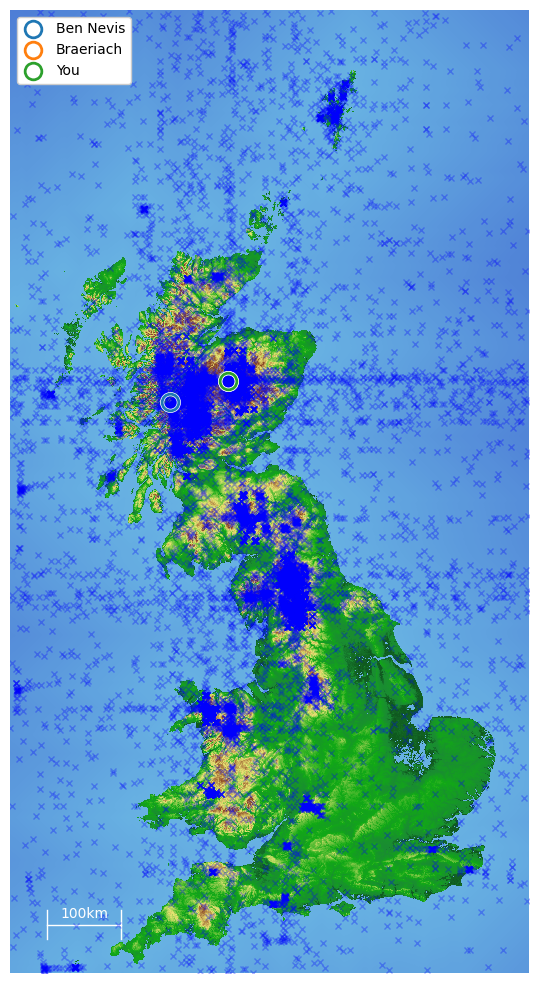

In [64]:
res = dual_ins.results[4]
res.plot_global()

## MLSL

In [67]:
mlsl.load_best_instance('../result/main.db')
mlsl_ins = mlsl.best_instance
mlsl_ins.trial.params

{'population': 10}

In [70]:
params_to_latex(mlsl_ins, int_fields=['population'])

& \texttt{population} & 10 \\


In [73]:
mlsl_ins.run(
    save_handler=save_handler,
    save_partial=False,
    restart=True,
    does_prune=False,
)

1021763it [03:49, 4458.12it/s]                            


In [74]:
mlsl_ins.performance_measures()

{'success_rate': 0.18181818181818182,
 'failure_rate': 0.8181818181818181,
 'success_cnt': 4,
 'avg_success_eval': 30440.75,
 'hv': 3556.227272727273,
 'par2': 87352.86363636363,
 'par10': 414625.5909090909,
 'avg_height': 1313.2921416230035,
 'ert': 255440.74999999994,
 'sp': 167424.125,
 'success_rate_upper': 0.38517021976637866,
 'success_rate_lower': 0.07306766024105121,
 'success_rate_length': 0.31210255952532745,
 'gary_ert': 10533.639175257733}

In [75]:
performance_to_latex(mlsl_ins)

MLSL	& 22	& 18\%	& 1313	& \(2.55 \times 10^{5}\) 	& \(1.05 \times 10^{4}\) \\

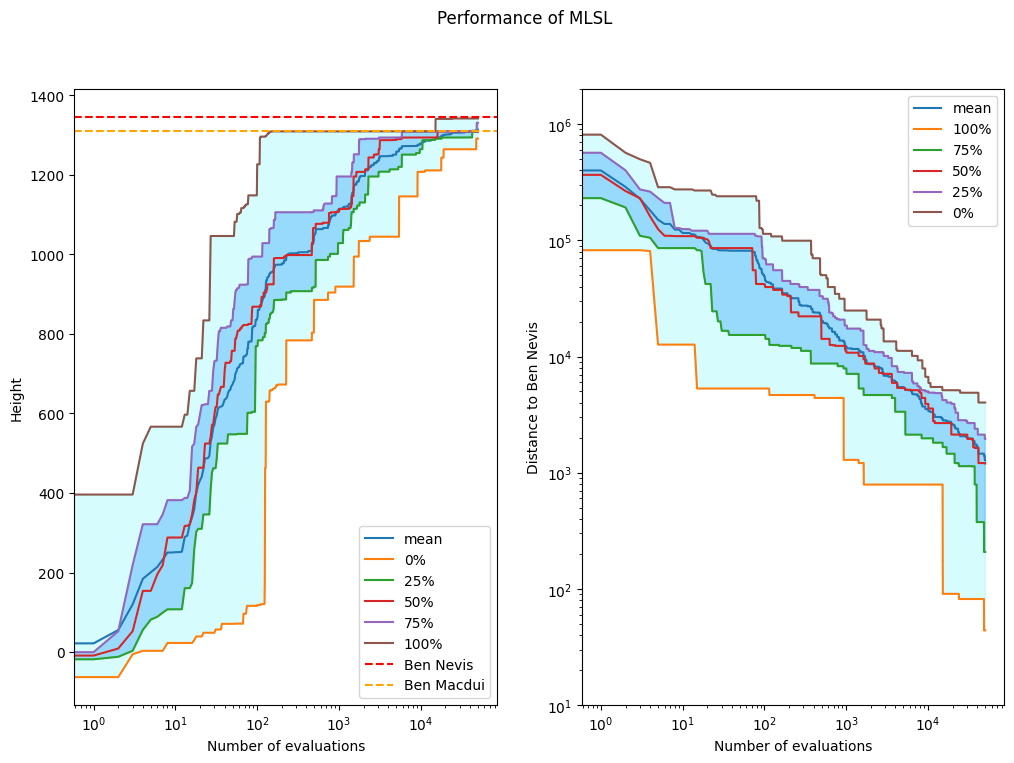

In [76]:
mlsl_ins.plot_convergence_graph()

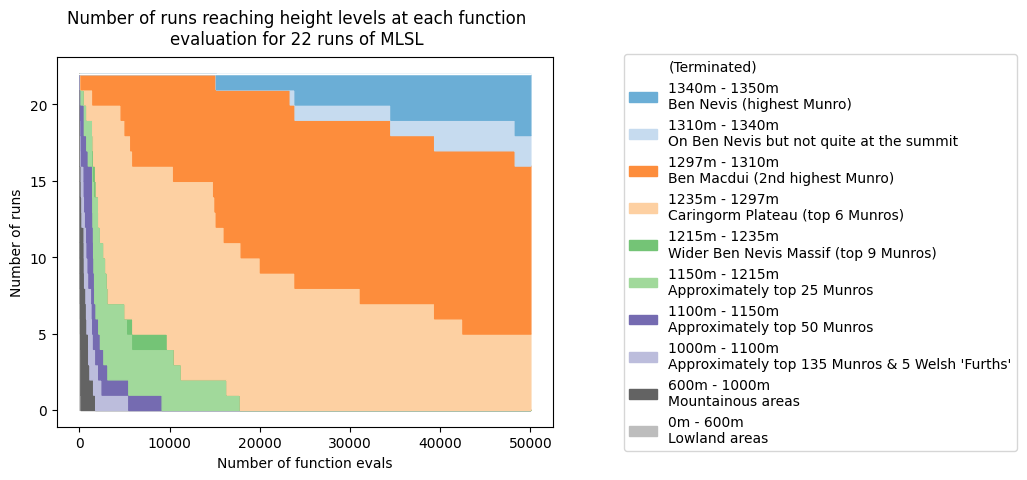

In [77]:
mlsl_ins.plot_stacked_graph()

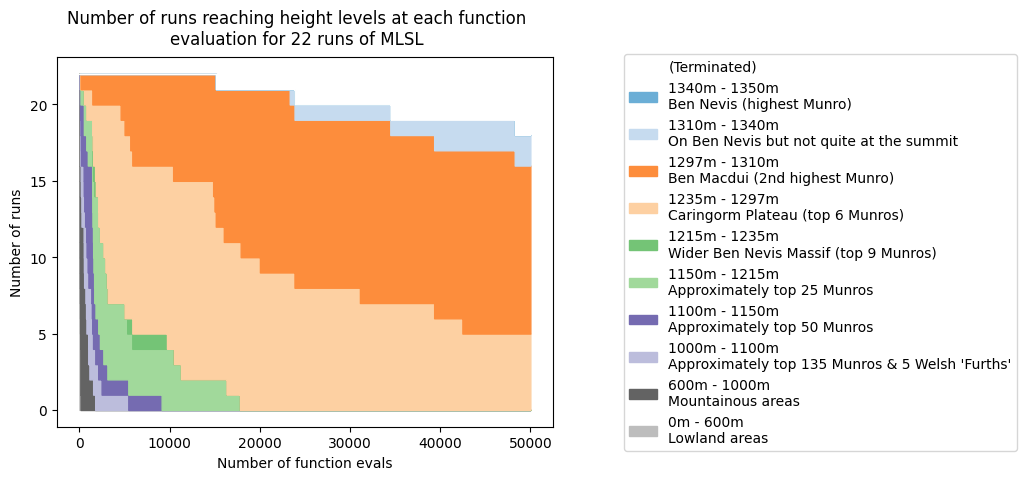

In [18]:
mlsl_ins.plot_stacked_graph(mode='terminate')

## IPOP CMAES

In [78]:
ipop_cmaes.load_best_instance('../result/apr.db')

In [79]:
ipop_ins = ipop_cmaes.best_instance
ipop_ins.trial.params
params_to_latex(ipop_ins, int_fields=['popsize_coeff', 'popsize0'])

& \texttt{sigma0} & \(3.12 \times 10^{5}\) \\
& \texttt{popsize\_coeff} & 2 \\
& \texttt{popsize0} & 7 \\


In [80]:
ipop_ins.run(
    save_handler=save_handler,
    save_partial=False,
    restart=True,
    does_prune=False,
)

100%|██████████| 1000000/1000000 [02:41<00:00, 6175.77it/s]


In [81]:
ipop_ins.performance_measures()

{'success_rate': 0,
 'failure_rate': 1,
 'success_cnt': 0,
 'avg_success_eval': inf,
 'hv': 0,
 'par2': inf,
 'par10': inf,
 'avg_height': 1311.9160214397086,
 'ert': inf,
 'sp': inf,
 'success_rate_upper': 0,
 'success_rate_lower': 0,
 'success_rate_length': 0,
 'gary_ert': 13888.888888888889}

In [88]:
performance_to_latex(ipop_ins)

IPOP_CMAES	& 20	& 0\%	& 1312	& \( +\infty \) 	& \(1.39 \times 10^{4}\) \\

In [82]:
for result in ipop_ins.results:
    print(result.ret_height, result.eval_num, result.len_points)

1336.942532798624 50000 50470
1309.0973307926254 50000 50253
1307.8113330825784 50000 50281
1309.0973523022585 50000 50743
1309.0251104198753 50000 50666
1309.098951146957 50000 50876
1309.099622358374 50000 50568
1309.088485204898 50000 51205
1309.095134568911 50000 50687
1310.6882064058275 50000 50057
1309.0990654871182 50000 50113
1309.0974844092245 50000 50183
1309.0992577119212 50000 50890
1309.0962374838139 50000 50547
1309.0983336890176 50000 50253
1309.096244615688 50000 50036
1308.7584414680227 50000 50393
1309.0996881229053 50000 50421
1309.0985660787585 50000 50358
1337.7330506467736 50000 50505


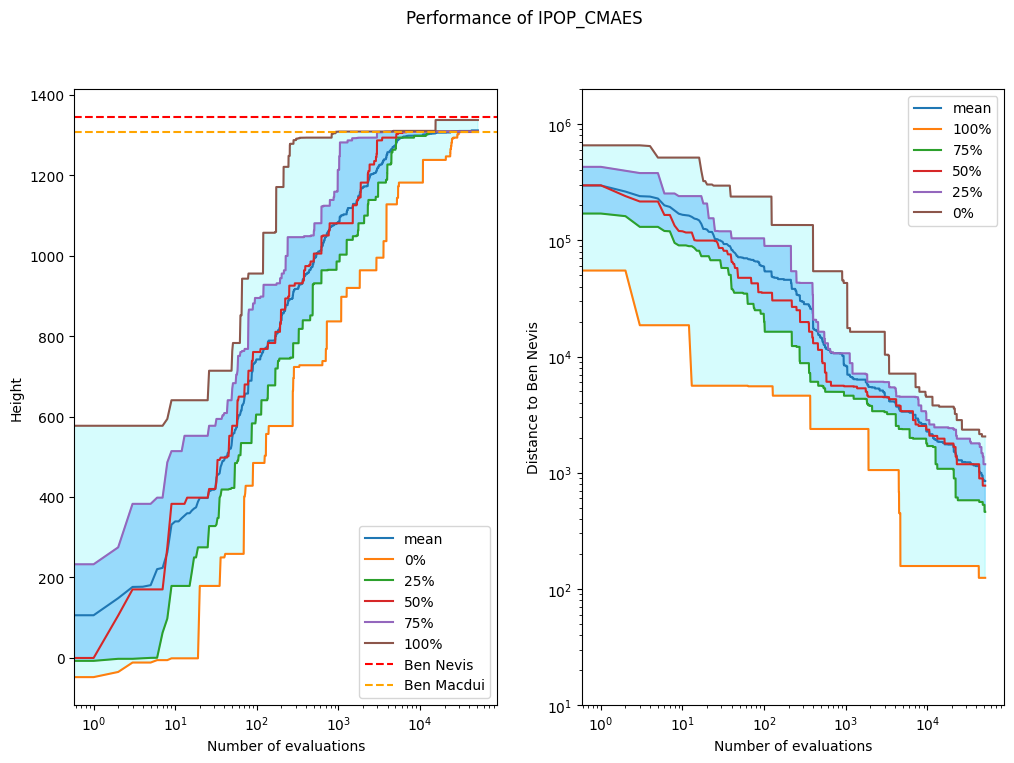

In [83]:
ipop_ins.plot_convergence_graph()

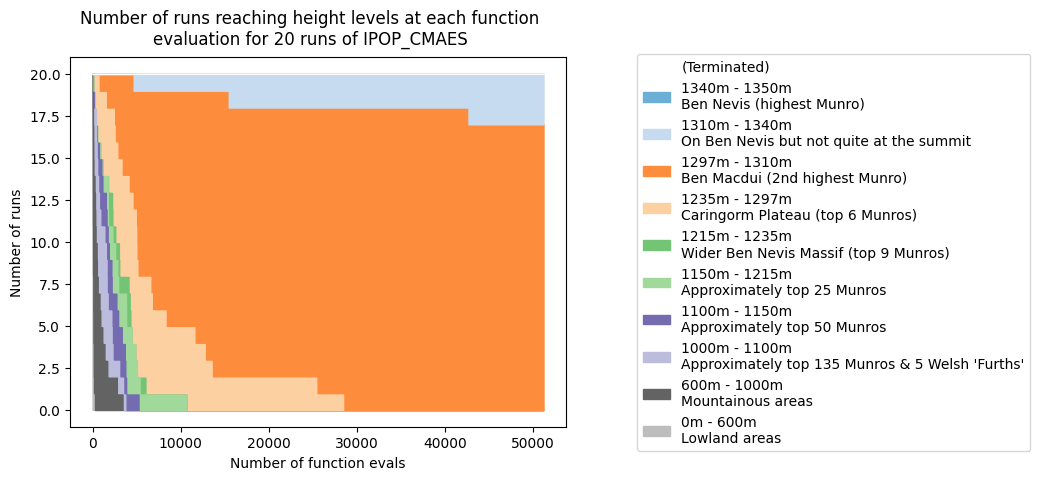

In [28]:
ipop_ins.plot_stacked_graph()

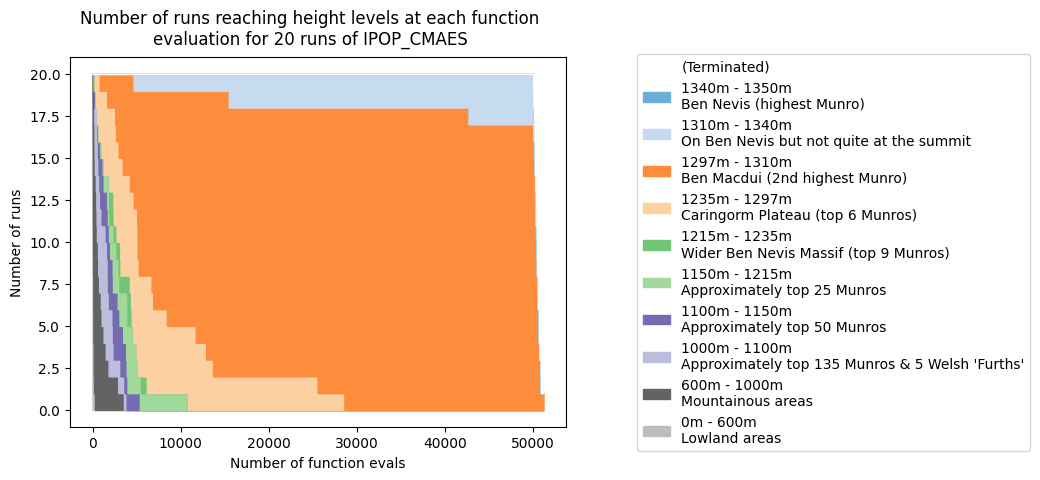

In [29]:
ipop_ins.plot_stacked_graph(mode='terminate')